Linear Regression 
=========================

## Optimisation Techniques

*This notebook addresses some of the issues with the Gradient Descent algorithm and describes some existing modifications and alternatives used in practise*

* Stochastic gradient descent
* Mini-Batch gradient descent


### Import libraries 
We will mostly be using numpy for mathematical operations and matplotlib to produce plots 

In [167]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Generate Data

In [168]:
# Generate some data
num_points = 500
x_data,y_data = [],[]

# Define theta parameters for producing test data - Gradient Descent should produce similar values
t0,t1 = 0.4,0.2

for i in xrange(num_points):
    x = np.random.normal(0.0,0.55)
    y = t0 + (x * t1) + np.random.normal(0.0,0.03)
    x_data.append(x)
    y_data.append(y)

### Define Parameters

In [169]:
# size of dataset
m = np.shape(x_data)[0]
# Generate the feature matrix
X = np.column_stack((np.ones(m),x_data)) 
# Initialise theta vector
theta = np.array(np.zeros(2)) 

### Cost Function

In [170]:
def Cost(X,theta,m,y):

    h = np.dot(X,theta)
    S = np.sum((h - np.transpose(y))**2)
    J = S / (m) # or 2*m

    return J

### Choosing the Learning Rate in Gradient Descent

When selecting the learning rate $\alpha$ you want to make sure it is not too low as it will take many iterations before it is able to find the minimum. Conversely, a high learning rate may cause Gradient Descent to overshoot the minimum.

In [171]:
def GradientDescent_hist(X,y,theta,alpha,iterations,m):

    Jhist = np.zeros((iterations,1))
    Jhist[0] = Cost(X,theta,m,y)
    xTrans = X.transpose() 
    for i in xrange(1,iterations):
        h = np.dot(X,theta)
        errors = h - np.transpose(y)  
        theta_change = (alpha/m) * np.dot(xTrans,errors)
        theta = theta - theta_change 

        Jhist[i] = Cost(X,theta,m,y)

    return theta,Jhist

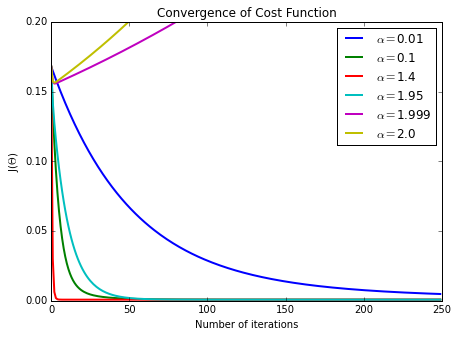

In [172]:
# -- Define hyperparameters and run Gradient Descent -- #
# learning rates
alpha_pars = [0.01,0.1,1.4,1.95,1.999,2.0]
# No. iterations for Gradient Descent
iterations = 250

fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')

for alpha in alpha_pars:
    # Initialise theta vector
    theta = np.array(np.zeros(2)) 
    # Run Gradient Descent
    theta,Jhist = GradientDescent_hist(X,y_data,theta,alpha,iterations,m)
    plt.plot(xrange(Jhist.size), Jhist, linewidth=2, label="".join(("$ \\alpha=$", str(alpha) )) )

plt.title("Convergence of Cost Function")
plt.xlabel('Number of iterations')
plt.ylabel('J($\Theta$)')
plt.legend()
plt.ylim((0,0.2))

plt.show()

The learning rate is a Goldilocks problem - you have to get it just right or Gradient Descent can take a long time to converge or it may overshoot the minimum.

### Alternative Optimisation Techniques

Ideally, the learning rate should be high initially and low as it hones in on the local minimum. Vanilla Gradient Descent, also known as Batch Gradient Descent (BGD), will always suffer in some form - either long learning times or poor optimisation.

We can represent Batch Gradient Descent in the following ways: 

$\theta_j = \theta_j - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta}(x^i) - y^i))x^i_j$,

where $i$ is the training sample, $j$ is the index for each weight in $\theta$, and $\alpha$ is the learning rate which indicates how much we adjust the weights in the direction of the gradient. 

In vector form:

$\theta = \theta - \alpha . \nabla_\theta J(\theta) $,

where $\nabla_\theta J(\theta)$ is the gradient of the cost function with respect to $\theta$.


#### Stochastic Gradient Descent (SGD)

Rather than calculating the cost on the entire dataset for each iteration, SGD updates $\theta$ for individual samples for each iteration. 

$\theta_j = \theta_j - \alpha . (h_{\theta}(x^i) - y^i))x^i_j$,

$\theta = \theta - \alpha . \nabla_\theta J(\theta,x^i,x^i) $,

*Below the BGD function is redefined for producing a different plot*

In [173]:
def GradientDescent_hist(X,y,theta,alpha,iterations,m):

    Jhist = np.zeros(((iterations*m),1))
    # Fill the first m values as the initial cost
    a = np.empty((m,1),dtype=float)
    a.fill(Cost(X,theta,m,y))
    Jhist[0:m] = a

    xTrans = X.transpose() 
    for i in xrange(1,iterations):
        h = np.dot(X,theta)
        errors = h - np.transpose(y)  
        theta_change = (alpha/m) * np.dot(xTrans,errors)
        theta = theta - theta_change 

        for sample in xrange(m):
            Jhist[(i*m)+sample] = Cost(X,theta,m,y)

    return theta,Jhist


def SGD_hist(X,y,theta,alpha,iterations,m):

    Jhist = np.zeros(((iterations*m)+2,1))
    Jhist[0] = Cost(X,theta,m,y)
    for i in xrange(iterations):
        for sample in xrange(m): 

            h = np.dot(X[sample,:],theta)
            errors = h - y[sample]  
            theta_change = alpha * np.dot(np.transpose(X[sample,:]),errors)
            theta = theta -theta_change 

            Jhist[(i*m)+sample+1] = Cost(X,theta,m,y)

    return theta,Jhist

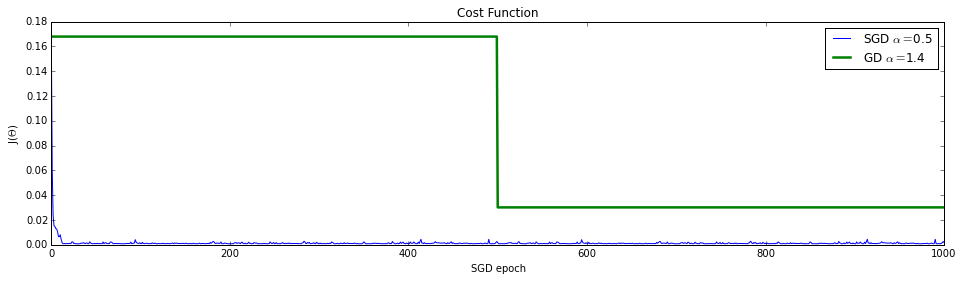

In [174]:
# learning rates
alpha = 1.4
alpha_SGD = 0.5
# No. iterations for Gradient Descent
iterations = 2

fig = plt.figure(figsize=(16, 4),facecolor='w', edgecolor='k')

# Initialise theta vector
theta_SGD = np.array(np.zeros(2)) 
theta     = np.array(np.zeros(2)) 
# Run Gradient Descent
theta_SGD,Jhist_SGD = SGD_hist(X,y_data,theta_SGD,alpha_SGD,iterations,m)
theta,Jhist         = GradientDescent_hist(X,y_data,theta,alpha,iterations,m)
plt.plot(xrange(Jhist_SGD.size), Jhist_SGD, linewidth=1, label="".join(("SGD $ \\alpha=$", str(alpha_SGD) )) )
plt.plot(xrange(Jhist.size), Jhist, linewidth=2.5, label="".join(("GD $ \\alpha=$", str(alpha) )) )

plt.title("Cost Function")
plt.xlabel('SGD epoch')
plt.ylabel('J($\Theta$)')
plt.legend()
plt.ylim((0,0.18))
plt.xlim((0,iterations*m))

plt.show()

As SGD performs a parameter update for each training sample, during each iteration, we can afford to reduce the learning rate. This also reduces the variation problem that SGD inherently has due to the variability of the noisy training data.

It should be noted that this is not a comparison of optimisation over compute, it is merely showing that SGD performs an update for each training sample where as BGD takes into account the whole dataset to update $\theta$. This is especially true since we added another <b>for</b> loop in the SGD function and so it doesn't make use of optimised vector functions. However, BGD clearly has a lot of redundancy as it performs exactly the same operation for each iteration with just a different $\theta$. Conversely, in SGD the cost function is calculated using a different $\theta$ and training sample for each update.

In [175]:
cost = Cost(X,theta,m,y_data)
cost_SGD = Cost(X,theta_SGD,m,y_data)
print "Number of iterations: ", iterations
print "GD theta: ", theta, " GD cost: ", cost
print "SGD theta: ", theta_SGD, " SGD cost: ", cost_SGD

Number of iterations:  2
GD theta:  [ 0.55228925  0.06549179]  GD cost:  0.0301637552645
SGD theta:  [ 0.43146853  0.19568618]  SGD cost:  0.00177902975863


With just a couple of iterations SGD can greatly reduce the cost, even with a lower learning rate.

In [176]:
iterations = 500
alpha = 1.4
alpha_SGD = 0.1
# Initialise theta vector
theta_SGD = np.array(np.zeros(2)) 
theta     = np.array(np.zeros(2)) 
# Run Gradient Descent
theta_SGD,Jhist_SGD = SGD_hist(X,y_data,theta_SGD,alpha_SGD,iterations,m)
theta,Jhist         = GradientDescent_hist(X,y_data,theta,alpha,iterations,m)

cost = Cost(X,theta,m,y_data)
cost_SGD = Cost(X,theta_SGD,m,y_data)
print "Number of iterations: ", iterations
print "GD theta: ", theta, " GD cost: ", cost
print "SGD theta: ", theta_SGD, " SGD cost: ", cost_SGD

Number of iterations:  500
GD theta:  [ 0.4004172   0.19535767]  GD cost:  0.00081543127934
SGD theta:  [ 0.41284382  0.19625939]  SGD cost:  0.000969417652795


Honing in on the local minimum is not so easy with SGD due to the variability of the training data - each noisy training sample will shift your hypothesis in all sorts of orientations thus affecting the overall cost.